# Systemy uczące się - Zad. dom. 4: Ocena modeli predykcyjnych

### Autor rozwiązania
Uzupełnij poniższe informacje umieszczając swoje imię i nazwisko oraz numer indeksu:

In [ ]:
NAME = "Wojciech Kot"
ID = "151879"

Ten notebook zawiera zadania związane z oceną modeli predykcyjnych. Oprócz zadań programistycznych, notebook zawira również pytania, na które trzeba odpowiedzieć. Odpowiedzi nie muszą być długie, ale powinny być merytoryczne i odnosić się do omawianych zagadnień. W tym zadaniu domowym należy odpowiedzieć na WSZYSTKIE pytania.


## Format danych
W tym zadaniu domyślnym typem danych będą macierze (`np.ndarray`) o rozmiarze `(n, c)`, gdzie `n` to liczba obserwacji, a `c` to liczba klas. Wartości w macierzy będą reprezentować:

- w przypadku `y` - prawdziwe klasy (wartości binarne). Na przykład:
    ```
    [
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
    ]
    ```
    oznacza, że pierwsza i trzecia obserwacja należą do klasy 0, a druga do klasy 2.

- w przypadku `y_hat` - predykcje modelu. Wartości w macierzy mogą reprezentować:
    * prawdopodobieństwa przynależności do danej klasy (wartości z przedziału `[0, 1]`). Na przykład:
        ```
        [
            [0.9, 0.1, 0.0],
            [0.1, 0.2, 0.7],
            [0.8, 0.2, 0.0],
        ]
        ```
        oznacza, że model przewiduje, że pierwsza obserwacja należy do klasy 0 z prawdopodobieństwem 0.9, a do klasy 1 z prawdopodobieństwem 0.1.
    
    * predykcje (wartości binarne), gdzie wartość `1` oznacza przynależność do danej klasy, a wartość `0` jej brak.
        ```
        [
            [0, 1, 0],
            [0, 0, 1],
            [0, 1, 0],
        ]
        ```
        oznacza, że model przewiduje, że pierwsza obserwacja należy do klasy 1, a druga do klasy 2.

# Zadanie 1: Punktowe miary oceny klasyfikatorów

Zadanie polega na zaimplementowaniu funkcji obliczających punktowe miary oceny klasyfikatorów, takich jak:
- dokładność (accuracy),
- precyzja (precision),
- czułość (recall),
- specyficzność (specificity),
- F1,
- G-mean,
- balanced accuracy.

Uwagi:
- Do rozwiązania zadania można wykorzystać wyłącznie bibliotekę `numpy`.
- Na potrzeby zadania domowego można założyć, że klasyfikacja jest wieloklasowa, ale jednoetykietowa (tj. każda obserwacja należy do dokładnie jednej klasy).
- W przypadku, gdy mianownik w równaniu miary oceny jest równy 0, wartość miary powinna wynosić 0.
- Podpowiedź: przy obliczaniu wielu miar warto zaimplementować funkcję pomocniczą, która oblicza macierz pomyłek.

In [ ]:
from typing import Literal

import numpy as np

In [ ]:
y = np.eye(2, dtype=int)[np.repeat([0, 1], 50)]
y_hat_0 = np.tile([1, 0], (100, 1))
y_hat_1 = np.tile([0, 1], (100, 1))

In [ ]:
def confusion_matrix(y_hat: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Funkcja obliczająca macierz pomyłek.

    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`.
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`.

        Returns:
        np.ndarray: Macierz pomyłek o wymiarach `(c, c)`.
        rzeczywista klasa\\klasa predykcji
                         \\     0    ||     1    || ...
                       0 || 0 jako 0 || 0 jako 1 || ...
                       1 || 1 jako 0 || 1 jako 1 || ...
                       ...
    """
    n = y.shape[0]
    # c = y.shape[1]

    # argmax w razie prawdopodobieństw
    if y.ndim == 2:
        y = np.argmax(y, axis=1)
    if y_hat.ndim == 2:
        y_hat = np.argmax(y_hat, axis=1)

    c = max(y.max(), y_hat.max()) + 1

    cm = np.zeros((c, c),dtype=int)
    for true_label, pred_label in zip(y, y_hat):
        cm[true_label, pred_label] += 1
    return cm

# cm = confusion_matrix(y, y)
# print(cm)
cm = confusion_matrix(y_hat_1, y)
print(cm)


[[ 0 50]
 [ 0 50]]


In [ ]:
def accuracy(y_hat: np.ndarray, y: np.ndarray) -> float:
    """Funkcja obliczająca dokładność klasyfikacji (accuracy). Funkcja powinna wspierać klasyfikację wieloklasową.

    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`.
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`.

    Returns:
        float: Dokładność klasyfikacji.
    """
    cm = confusion_matrix(y_hat, y)
    return np.trace(cm) / np.sum(cm)

acc = accuracy(y_hat_0, y)
print(acc)

0.5


In [ ]:
def precision(y_hat: np.ndarray, y: np.ndarray, average: Literal["micro", "macro"] = "micro") -> float:
    """Funkcja obliczająca precyzję klasyfikacji (precision). Funkcja powinna wspierać klasyfikację wieloklasową.

    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`.
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`.
        average ("micro" | "macro"): Typ uśredniania wyników. Domyślnie "micro".

    Returns:
        float: Precyzja klasyfikacji.
    """
    cm = confusion_matrix(y_hat, y)
    if average == "micro":
        return np.sum(np.diag(cm)) / np.sum(cm) if np.sum(cm) > 0 else 0.0
    else:
        return np.mean(np.diag(cm) / np.sum(cm, axis=0, where=np.sum(cm, axis=0) > 0, initial=1))


In [ ]:
def recall(y_hat: np.ndarray, y: np.ndarray, average: Literal["micro", "macro"] = "micro") -> float:
    """Funkcja obliczająca czułość klasyfikacji (recall). Funkcja powinna wspierać klasyfikację wieloklasową.

    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`.
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`.
        average ("micro" | "macro"): Typ uśredniania wyników. Domyślnie "micro".

    Returns:
        float: Precyzja klasyfikacji.
    """
    cm = confusion_matrix(y_hat, y)
    if average == "micro":
        return np.sum(np.diag(cm)) / np.sum(cm) if np.sum(cm) > 0 else 0.0
    else:
        return np.mean(np.diag(cm) / np.sum(cm, axis=1, where=np.sum(cm, axis=1) > 0, initial=1))

In [ ]:
def specificity(y_hat: np.ndarray, y: np.ndarray, average: Literal["micro", "macro"] = "micro") -> float:
    """Funkcja obliczająca specyficzność klasyfikacji (specificity). Funkcja powinna wspierać klasyfikację wieloklasową.

    Args:
        y_hat (np.ndarray): Macierz z predykacjami modelu o wymiarach `(n, c)`.
        y (np.ndarray): Macierz z prawdziwymi klasami o wymiarach `(n, c)`.
        average ("micro" | "macro"): Typ uśredniania wyników. Domyślnie "micro".

    Returns:
        float: Specyficzność klasyfikacji.
    """
    cm = confusion_matrix(y_hat, y)
    TN = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - np.diag(cm))
    FP = np.sum(cm, axis=0) - np.diag(cm)
    if average == "micro":
        return np.sum(TN) / (np.sum(TN) + np.sum(FP)) if (np.sum(TN) + np.sum(FP)) > 0 else 0.0
    else:
        specificity_per_class = np.where((TN + FP) > 0, TN / (TN + FP), 0.0)
        return np.mean(specificity_per_class)

In [ ]:
def f1_score(y_hat: np.ndarray, y: np.ndarray, average: Literal["micro", "macro"] = "micro") -> float:
  p = precision(y_hat, y, average)
  r = recall(y_hat, y, average)
  return 2 * p * r / (p + r) if (p + r) > 0 else 0.0


In [ ]:
def g_mean(y_hat: np.ndarray, y: np.ndarray, average: Literal["micro", "macro"] = "micro") -> float:
  r = recall(y_hat, y, "macro")
  s = specificity(y_hat, y, "macro")
  return np.sqrt(r * s)

In [ ]:
def balanced_accuracy(y_hat: np.ndarray, y: np.ndarray, average: Literal["micro", "macro"] = "micro") -> float:
  r = recall(y_hat, y, "macro")
  s = specificity(y_hat, y, "macro")
  return (r + s) / 2

Zatrzymaj się w tym miejscu na chwilę i poeksperymentuj z dotychczas zaimplementowanymi funkcjami i danymi testowymi. Spróbuj zrozumieć, jak działają poszczególne miary oceny klasyfikatorów. Możesz ograniczyć się do uśredniania wyników "micro".

In [ ]:
# Miejsce na eksperymenty

print(confusion_matrix(y_hat_0, y))
print(confusion_matrix(y_hat_1, y))
print("===")
print(accuracy(y_hat_0, y))
print(accuracy(y_hat_1, y))
print("===")
print(precision(y_hat_0, y))
print(precision(y_hat_1, y))
print("===")
print(recall(y_hat_0, y))
print(recall(y_hat_1, y))
print("===")
print(specificity(y_hat_0, y))
print(specificity(y_hat_1, y))
print("===+++===")
print(precision(y_hat_0, y, "macro"))
print(precision(y_hat_1, y, "macro"))
print("===")
print(recall(y_hat_0, y, "macro"))
print(recall(y_hat_1, y, "macro"))
print("===")
print(specificity(y_hat_0, y, "macro"))
print(specificity(y_hat_1, y, "macro"))
print("=== === ===")
print(f1_score(y_hat_0, y))
print(f1_score(y_hat_1, y))
print("===")
print(g_mean(y_hat_0, y))
print(g_mean(y_hat_1, y))
print("===")
print(balanced_accuracy(y_hat_0, y))
print(balanced_accuracy(y_hat_1, y))
print("===+++===")
print(f1_score(y_hat_0, y, "macro"))
print(f1_score(y_hat_1, y, "macro"))

[[50  0]
 [50  0]]
[[ 0 50]
 [ 0 50]]
===
0.5
0.5
===
0.5
0.5
===
0.5
0.5
===
0.5
0.5
===+++===
0.24752475247524752
0.24752475247524752
===
0.49019607843137253
0.49019607843137253
===
0.5
0.5
=== === ===
0.5
0.5
===
0.49507377148833714
0.49507377148833714
===
0.4950980392156863
0.4950980392156863
===+++===
0.3289473684210526
0.3289473684210526


Odpowiedz na pytanie

1. Czy zaimplementowane funkcje mogą być wystarczające do oceny modeli klasyfikacyjnych? Jeśli nie, to dlaczego? Jeśli tak, to w jakich przypadkach?

[TODO: Twoja odpowiedź]
Te funkcje zdecydowanie wystarczą przy klasyfikacji jednoetykietowej dla zbalansowanych klas, ale przy klasyfikacji wieloetykietowej nie mamy zaimplementowanej żadnej miary biorącej pod uwagę przynależność do wielu klas, oraz nie mamy żadnego bardziej złożonego wskaźnika który mógłby trafniej ocenić klasyfikator dla niezbalansowanych klas.

Sprawdź jak zaimplementowane funkcje działają na 3 zbiorach testowych o różnej charakterystyce.

### Scenariusz 1

In [ ]:
# dane silnie niezbalansowane: 80% klasa 0, 10% klasa 1, 5% klasa 2, 5% klasa 3
y = np.eye(4)[np.array([0] * 80 + [1] * 10 + [2] * 5 + [3] * 5)]

# model przewiduje zawsze klasę 0
y_hat_all_0 = np.eye(4)[np.array([0] * 100)]

# model poprawnie przewiduje klasy 0 i 1, ale zawsze myli klasy 2 i 3
y_hat_partial = np.eye(4)[np.array([0] * 80 + [1] * 10 + [3] * 5 + [2] * 5)]

In [ ]:
# Miejsce na eksperymenty

print(confusion_matrix(y_hat_all_0, y))
print(confusion_matrix(y_hat_partial, y))
print("===")
print(accuracy(y_hat_all_0, y))
print(accuracy(y_hat_partial, y))
print("===")
print(precision(y_hat_all_0, y))
print(precision(y_hat_partial, y))
print("===")
print(recall(y_hat_all_0, y))
print(recall(y_hat_partial, y))
print("===")
print(specificity(y_hat_all_0, y))
print(specificity(y_hat_partial, y))
print("===+++===")
print(precision(y_hat_all_0, y, "macro"))
print(precision(y_hat_partial, y, "macro"))
print("===")
print(recall(y_hat_all_0, y, "macro"))
print(recall(y_hat_partial, y, "macro"))
print("===")
print(specificity(y_hat_all_0, y, "macro"))
print(specificity(y_hat_partial, y, "macro"))
print("=== === ===")
print(f1_score(y_hat_all_0, y))
print(f1_score(y_hat_partial, y))
print("===")
print(g_mean(y_hat_all_0, y))
print(g_mean(y_hat_partial, y))
print("===")
print(balanced_accuracy(y_hat_all_0, y))
print(balanced_accuracy(y_hat_partial, y))
print("===+++===")
print(f1_score(y_hat_all_0, y, "macro"))
print(f1_score(y_hat_partial, y, "macro"))

[[80  0  0  0]
 [10  0  0  0]
 [ 5  0  0  0]
 [ 5  0  0  0]]
[[80  0  0  0]
 [ 0 10  0  0]
 [ 0  0  0  5]
 [ 0  0  5  0]]
===
0.8
0.9
===
0.8
0.9
===
0.8
0.9
===
0.9333333333333333
0.9666666666666667
===+++===
0.19801980198019803
0.47418630751964086
===
0.24691358024691357
0.47418630751964086
===
0.75
0.9736842105263157
=== === ===
0.8000000000000002
0.9
===
0.4303314829119352
0.6794907802756784
===
0.4984567901234568
0.7239352590229783
===+++===
0.21978021978021978
0.47418630751964086


### Scenariusz 2

In [ ]:
# dane niezbalansowane: 50 próbek klasy 0, 25 klasy 1, 15 klasy 2, 10 klasy 3
y = np.eye(4)[np.array([0] * 50 + [1] * 25 + [2] * 15 + [3] * 10)]

# Model przewiduje 60 próbek jako klasa 0, reszta losowo
np.random.seed(42)
y_hat = np.eye(4)[np.array([0] * 60 + list(np.random.choice([1, 2, 3], size=40)))]

In [ ]:
# Miejsce na eksperymenty

print(confusion_matrix(y_hat, y))
print("===")
print(accuracy(y_hat, y))
print("===")
print(precision(y_hat, y))
print("===")
print(recall(y_hat, y))
print("===")
print(specificity(y_hat, y))
print("===+++===")
print(precision(y_hat, y, "macro"))
print("===")
print(recall(y_hat, y, "macro"))
print("===")
print(specificity(y_hat, y, "macro"))
print("=== === ===")
print(f1_score(y_hat, y))
print("===")
print(g_mean(y_hat, y))
print("===")
print(balanced_accuracy(y_hat, y))
print("===+++===")
print(f1_score(y_hat, y, "macro"))

[[50  0  0  0]
 [10  4  2  9]
 [ 0  6  6  3]
 [ 0  1  4  5]]
===
0.65
===
0.65
===
0.65
===
0.8833333333333333
===+++===
0.47308042594927835
===
0.4909459413135884
===
0.8756862745098039
=== === ===
0.65
===
0.6556787493388855
===
0.6833161079116961
===+++===
0.4818476401099742


### Scenariusz 3

In [ ]:
# dane niezbalansowane jak w Scenariuszu 2
y = np.eye(4)[np.array([0] * 50 + [1] * 25 + [2] * 15 + [3] * 10)]

# model losowy
np.random.seed(0)
y_hat = np.eye(4)[np.random.choice([0, 1, 2, 3], size=100)]

In [ ]:
# Miejsce na eksperymenty

print(confusion_matrix(y_hat, y))
print("===")
print(accuracy(y_hat, y))
print("===")
print(precision(y_hat, y))
print("===")
print(recall(y_hat, y))
print("===")
print(specificity(y_hat, y))
print("===+++===")
print(precision(y_hat, y, "macro"))
print("===")
print(recall(y_hat, y, "macro"))
print("===")
print(specificity(y_hat, y, "macro"))
print("=== === ===")
print(f1_score(y_hat, y))
print("===")
print(g_mean(y_hat, y))
print("===")
print(balanced_accuracy(y_hat, y))
print("===+++===")
print(f1_score(y_hat, y, "macro"))

[[12 12  8 18]
 [ 9  5  5  6]
 [ 2  6  3  4]
 [ 2  1  3  4]]
===
0.24
===
0.24
===
0.24
===
0.7466666666666667
===+++===
0.23318764568764572
===
0.2446845433977787
===
0.7468300653594773
=== === ===
0.24
===
0.4274783895569657
===
0.49575730437862797
===+++===
0.23879779536986204


### Pytania

Odpowiedz na pytania:
1. Jakie różnice daje uśrednianie wyników "micro" w porównaniu do "macro"? Dla jakich danych warto użyć jednego, a dla jakich drugiego sposobu uśredniania wyników?
2. Dlaczego warto stosować zbalansowaną dokładność (balanced accuracy) zamiast zwykłej dokładności (accuracy)?
3. Dlaczego warto stosować miarę G-mean zamiast F1? Dla jakich scenariuszy miara G-mean pozwala na bardziej adekwatną ocenę modelu?

[TODO: Twoje odpowiedzi]

1.
Micro powinno zostać użyte przy zbalansowanych zbiorach danych, dla obliczenia ogólnej skuteczności klasyfikatora, albo gdy błędy w często występujących klasach są równie istotne co te w rzadko występujących.
Macro natomiast, gdy klasy są niezbalansowane i potrzeba sprawdzić czy model działa poprawnie również dla rzadko występujących klas, oraz gdy każda klasa jest równie istotna (jak w klasyfikacji chorób, bo rzadkie przypadki będą bardzo ważne).

Główne różnice jakie daje obliczanie micro od macro to to że micro oblicza globalne wartości dla całego zbioru z równą wagą każdej próbki, a macro oblicza globalne wartości z równą wagą każdej klasy. Stąd, rzadziej występujące klasy mają większy wpływ na macro, a znikomy na micro.

2. Balanced Accuracy będzie lepszą miarą w przypadku niezbalansowanych klas, bo zapewni równoważność każdej klasie, podczas gdy zwykłe Accuracy może być zwodnicze przy niezbalansowanych klasach, co pokazuje scenariusz 1.

3. G-mean sprawdzi się lepiej od F1 przy niezbalansowanych danych, tak jak balanced accuracy opisane wyżej, a więc przy wykrywaniu rzadkich przypadków (chorób, oszustów, anomalii w sieciach) oraz w przypadku gdy chcemy zapewnić wysoką czułość bez podnoszenia ilości fałszywych alarmów (FP)
F1 jest balansem między precyzją a czułością, ale będzie gdy chcemy wziąć pod uwagę specyficzność, co robi G-mean.

# Zadanie 2: k-folds cross-validation

Zaimplementuj funkcję `split_to_k_folds`, która dokona podziału danych na `k` zbiorów treningowych i testowych. Następnie dokonaj analizy wpływu stratyfikacji na postrzegane ryzyko modelu.

In [ ]:
def split_to_k_folds(x: np.ndarray, y: np.ndarray, k: int = 5, stratify: bool = True
                     ) -> list[tuple[tuple[np.ndarray, np.ndarray], tuple[np.ndarray, np.ndarray]]]:
    """Funkcja implementująca k-krotną walidację krzyżową.

    W przypadku stratyfikacji, funkcja powinna zachować proporcje klas w podziałach. W tym celu można
    wykorzystać prosty algorytm zaproponowany podczas laboratorium.

    Funkcja powinna zwracać listę krotek, gdzie każda krotka zawiera dane podzielone na zbiór treningowy i testowy.
    Rozwiązanie to w oczywisty sposób nie jest optymalne pod względem pamięciowym, ale taki format zwracania danych
    pomoże w dalszej części zadania.

    Args:
        x (np.ndarray): Macierz z danymi o wymiarach `(n, d)`.
        y (np.ndarray): Macierz z etykietami o wymiarach `(n, c)`.
        k (int): Liczba podziałów zbioru danych. Domyślnie 5.
        stratify (bool): Czy zachować proporcje klas w podziałach. Domyślnie `True`.

    Returns:
        list[tuple[np.ndarray]]: Lista krotek z podziałami danych na zbiór treningowy i testowy.
    """
    # TODO: zaimplementuj funkcję
    splits = []
    n = x.shape[0]
    indices = np.arange(n)

    if stratify:
      unique_classes, y_indicies = np.unique(y, return_inverse=True)
      class_indices = [np.where(y == c)[0] for c in unique_classes]
      folds = [[] for _ in range(k)]

      for cls in unique_classes:
        cls_indicies = indices[y_indicies == cls]
        np.random.shuffle(cls_indicies)

        for i, idx in enumerate(cls_indicies):
          folds[i % k].append(idx)

    else:
      np.random.shuffle(indices)
      folds = np.array_split(indices, k)

    splits = []
    for i in range(k):
      test_indices = folds[i]
      train_indices = np.setdiff1d(indices, test_indices)

      splits.append((
        (x[train_indices], y[train_indices]),
        (x[test_indices], y[test_indices])
      ))
    return splits


Przykładowe dane testowe. Zwróć uwagę, że dane te są niezbalansowane. Możesz dokonać modyfikacji danych, aby zobaczyć, jak zachowuje się algorytm w zależności od charakterystyki danych.

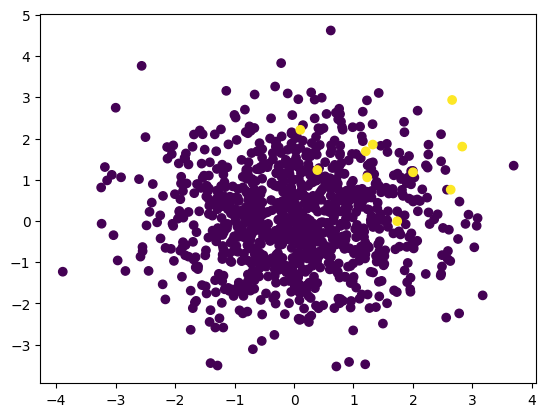

In [ ]:
import matplotlib.pyplot as plt

n0 = 1000
n1 = 10

np.random.seed(42)
x1 = np.random.randn(n0, 2) * 1.2
x2 = np.random.randn(n1, 2) + [2, 2]

x = np.vstack([x1, x2])
y = np.array([0] * n0 + [1] * n1)

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [ ]:
splits_stratified = split_to_k_folds(x, y, k=5, stratify=True)
splits = split_to_k_folds(x, y, k=5, stratify=False)

Przeprowadź walidację krzyżową dla klasyfikatora `GaussianNB` na danych z poprzedniego kroku. Porównaj wyniki dla obu wariantów podziału danych. Na podstawie obserwacji z poprzedniego zadania, wybierz miary oceny klasyfikatora, które uznasz za najbardziej adekwatne do tego zadania.

Poniższą komórkę możesz dowolnie modyfikować, aby np. obliczać kilka miar jednocześnie.

In [ ]:
from sklearn.naive_bayes import GaussianNB

metrics = []

for (x_train, y_train), (x_test, y_test) in splits_stratified:
    model = GaussianNB()
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    metrics.append([
        # TODO: oblicz wybrane miary klasyfikacji
        accuracy(y_hat, y_test),
        precision(y_hat, y_test),
        recall(y_hat, y_test),
        specificity(y_hat, y_test),
        f1_score(y_hat, y_test),
        g_mean(y_hat, y_test),
        balanced_accuracy(y_hat, y_test)
      ]
    )

metrics = np.array(metrics)
means = np.mean(metrics, axis=0)
stds = np.std(metrics, axis=0)

print(f"Średnia wszystkich metryk {np.mean(metrics): .4f} +/- {np.std(metrics): .4f}")
print(f"  Accuracy:          {means[0]:.4f} +/- {stds[0]:.4f}")
print(f"  Precision:         {means[1]:.4f} +/- {stds[1]:.4f}")
print(f"  Recall:            {means[2]:.4f} +/- {stds[2]:.4f}")
print(f"  Specificity:       {means[3]:.4f} +/- {stds[3]:.4f}")
print(f"  F1-score:          {means[4]:.4f} +/- {stds[4]:.4f}")
print(f"  G-mean:            {means[5]:.4f} +/- {stds[5]:.4f}")
print(f"  Balanced Accuracy: {means[6]:.4f} +/- {stds[6]:.4f}")

Średnia wszystkich metryk  0.8497 +/-  0.2220
  Accuracy:          0.9901 +/- 0.0000
  Precision:         0.9901 +/- 0.0000
  Recall:            0.9901 +/- 0.0000
  Specificity:       0.9901 +/- 0.0000
  F1-score:          0.9901 +/- 0.0000
  G-mean:            0.4988 +/- 0.0000
  Balanced Accuracy: 0.4988 +/- 0.0000


In [ ]:
from sklearn.naive_bayes import GaussianNB

metrics = []

for (x_train, y_train), (x_test, y_test) in splits:
    model = GaussianNB()
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    metrics.append([
        # TODO: oblicz wybrane miary klasyfikacji
        accuracy(y_hat, y_test),
        precision(y_hat, y_test),
        recall(y_hat, y_test),
        specificity(y_hat, y_test),
        f1_score(y_hat, y_test),
        g_mean(y_hat, y_test),
        balanced_accuracy(y_hat, y_test)
      ]
    )

metrics = np.array(metrics)
means = np.mean(metrics, axis=0)
stds = np.std(metrics, axis=0)

print(f"Średnia wszystkich metryk {np.mean(metrics): .4f} +/- {np.std(metrics): .4f}")
print(f"  Accuracy:          {means[0]:.4f} +/- {stds[0]:.4f}")
print(f"  Precision:         {means[1]:.4f} +/- {stds[1]:.4f}")
print(f"  Recall:            {means[2]:.4f} +/- {stds[2]:.4f}")
print(f"  Specificity:       {means[3]:.4f} +/- {stds[3]:.4f}")
print(f"  F1-score:          {means[4]:.4f} +/- {stds[4]:.4f}")
print(f"  G-mean:            {means[5]:.4f} +/- {stds[5]:.4f}")
print(f"  Balanced Accuracy: {means[6]:.4f} +/- {stds[6]:.4f}")

Średnia wszystkich metryk  0.8497 +/-  0.2220
  Accuracy:          0.9901 +/- 0.0031
  Precision:         0.9901 +/- 0.0031
  Recall:            0.9901 +/- 0.0031
  Specificity:       0.9901 +/- 0.0031
  F1-score:          0.9901 +/- 0.0031
  G-mean:            0.4988 +/- 0.0000
  Balanced Accuracy: 0.4988 +/- 0.0000


### Pytania

Odpowiedz na pytania:
1. Jaka była Twoja motywacja do wybrania konkretnych miar klasyfikacji?
2. Dla jakich danych warto zastosować stratyfikację podczas walidacji krzyżowej?
3. Jakie ryzyko niesie za sobą losowy podział danych na dwa zbiory (treningowy i testowy), zamiast używania walidacji krzyżowej ze stratyfikacją?

[TODO: Twoje odpowiedzi]

Obliczam wszystkie zaimplementowane miary, z czystej ciekawości co do tego jak się zachowują gdy zmienię cokolwiek z danymi. Co do wyboru, to uważam że na największą uwagę zasługują:

Accuracy - klasyczna miara tego jak ogólnie skuteczny jest klasyfikator, chociaż nie powinna być jedyna, aby nie wpaść w pułapkę przy niezbalansowanych danych

F1-score - jako balans między precision i recall

G-mean - któremu również trzeba się przyjrzeć, aby nie zaniedbać jakiejś rzadziej występującej klasy


2. Stratyfikacja przynosi efekty w przypadku niezbalansowanych danych, szczególnie przy bardzo rzadkich klasach.

3. Jeśli jakaś klasa decyzyjna jest wyjątkowo rzadka, może jej zabraknąć w zbiorze treningowym, przez co klasyfikator nie nauczy się jej wykrywać, a do tego występuje znacznie większe ryzyko zarówno prze- jak i niedouczenia, bo jeśli zbiór treningowy będzie mieć same podobne do siebie przykłady, to klasyfikator będzie słabo generalizować, a więc się przeuczy, ale też gdy znajdą się same "rozstrzelone" w przestrzeni przypadki, to model nie nauczy się ich poprawnie klasyfikować.
Dodatkowo, walidacja krzyżowa zapewnia efektywniejsze wykorzystanie danych, bo każda próbka będzie i treningową i testową, zamiast tylko taką albo tylko taką, co znacząco podnosi jakośc klasyfikacji gdy zbiór danych przeznaczonych na trening jest niewielki.